# Task 0
## Exercise completed by Vandana

# PART 2, SECTION D: Dask DataFrames in code

## Task 1. Install and imports

In [1]:
import os
import dask
from dask.distributed import Client
import dask.dataframe as dd
import pandas as pd
import glob

In [2]:
from importlib.metadata import version
print(version('dask'))
print(version('joblib'))

2022.5.0
1.1.1


## Task 2. Obtain and read in the data

Filename includes a glob pattern *, so all files in the path matching that pattern will be read into the same Dask DataFrame.

In [3]:
filename = os.path.join('nycflights','*.csv')
filename

'nycflights\\*.csv'

`dd.read_csv()` parallelizes the `pandas.read_csv()` function in the following ways:

- It supports loading many files at once using globstrings:

Pandas .read_csv() cannot do this directly and would need more code to read and merge/ concatenate multiple files.

In [4]:
ddf = dd.read_csv(filename)
pdf = pd.concat(map(pd.read_csv, glob.glob(filename)))

## Task 3. Lazy operations

In [5]:
ddf

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,,,
,int64,int64,int64,int64,float64,int64,float64,int64,object,int64,float64,float64,int64,float64,float64,float64,object,object,float64,float64,float64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


Notice that the respresentation of the dataframe object contains no data - Dask has just done enough to read the start of the first file, and infer the column names and dtypes.


In [6]:
pdf

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990,1,1,1,1621.0,1540,1747.0,1701,US,33,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990,1,2,2,1547.0,1540,1700.0,1701,US,33,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990,1,3,3,1546.0,1540,1710.0,1701,US,33,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990,1,4,4,1542.0,1540,1710.0,1701,US,33,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990,1,5,5,1549.0,1540,1706.0,1701,US,33,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269176,1999,12,27,1,1645.0,1645,1830.0,1901,UA,1753,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,0,0
269177,1999,12,28,2,1726.0,1645,1928.0,1901,UA,1753,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,0,0
269178,1999,12,29,3,1646.0,1645,1846.0,1901,UA,1753,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,0,0
269179,1999,12,30,4,1651.0,1645,1908.0,1901,UA,1753,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,0,0


In [7]:
ddf.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990,1,1,1,1621.0,1540,1747.0,1701,US,33,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990,1,2,2,1547.0,1540,1700.0,1701,US,33,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990,1,3,3,1546.0,1540,1710.0,1701,US,33,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990,1,4,4,1542.0,1540,1710.0,1701,US,33,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990,1,5,5,1549.0,1540,1706.0,1701,US,33,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


## Task 4. Timing exercise

In [8]:
%timeit  ddf = dd.read_csv(filename)

25.7 ms ± 7.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
%timeit   pdf = pd.concat(map(pd.read_csv, glob.glob(filename)))

3.91 s ± 1.56 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Task 5. Dask DataFrame attributes

In [10]:
ddf.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted'],
      dtype='object')

In [11]:
ddf.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum              float64
ActualElapsedTime    float64
CRSElapsedTime         int64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
Diverted               int64
dtype: object

## Task 6. Read the data in again

Unlike `pandas.read_csv` which reads in the entire file before inferring datatypes, `dask.dataframe.read_csv` only reads in a sample from the beginning of the file (or first file if using a glob). These inferred datatypes are then enforced when reading all partitions.

In this case, the datatypes inferred in the sample are incorrect. The first several rows have no value for CRSElapsedTime (which pandas infers as a float), and later on turn out to be strings (object dtype). Note that Dask gives an informative error message about the mismatch. When this happens you have a few options:

- Specify dtypes directly using the `dtype` keyword. This is the recommended solution, as it's the least error prone (better to be explicit than implicit) and also the most performant.

- The date column (if there is one in the file) gets read as an object data type using the default read_csv(): To read the date column correctly, we can use the argument `parse_dates` to specify a list of date columns. If the date is split across multiple columns - say, day, month, year, we can specify parameter `parse_dates` and give it a dict with the name of the new date column, and the list of the columns names in order (year, month, day).

In [12]:
ddf = dd.read_csv(filename, 
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={'CRSElapsedTime': 'float64',
                        'TailNum': 'object'})


In [13]:
len(ddf)

2611892

In [14]:
# verify that a new Date column is added
ddf.tail()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269176,1999-12-27,1,1645.0,1645,1830.0,1901,UA,1753,N516UA,225.0,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,0,0
269177,1999-12-28,2,1726.0,1645,1928.0,1901,UA,1753,N504UA,242.0,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,0,0
269178,1999-12-29,3,1646.0,1645,1846.0,1901,UA,1753,N592UA,240.0,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,0,0
269179,1999-12-30,4,1651.0,1645,1908.0,1901,UA,1753,N575UA,257.0,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,0,0
269180,1999-12-31,5,1642.0,1645,1851.0,1901,UA,1753,N539UA,249.0,...,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,0,0


In [15]:
# verify that the dtypes of these two columns are float and object (with Nan values)
ddf[['CRSElapsedTime', 'TailNum']].sample(frac=0.001).compute()

,CRSElapsedTime,TailNum
80102,203.0,NaN
8025,186.0,NaN
84914,145.0,NaN
150201,383.0,NaN
104148,140.0,NaN
...,...,...
266792,121.0,N427US
59504,165.0,N635DL
156117,305.0,N637AW
235109,233.0,N17644


## Task 7. Obtaining a Dask Series and indexing Dask DataFrames

In [16]:
ddf['TailNum'].compute()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
269176    N516UA
269177    N504UA
269178    N592UA
269179    N575UA
269180    N539UA
Name: TailNum, Length: 2611892, dtype: object

In [17]:
ddf.loc[ddf['ArrTime'] < ddf['ArrTime'].mean()].compute()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
88,1990-01-01,1,1205.0,1110,1343.0,1243,US,49,NaN,98.0,...,NaN,60.0,55.0,LGA,CLE,418.0,NaN,NaN,0,0
89,1990-01-02,2,1158.0,1110,1327.0,1243,US,49,NaN,89.0,...,NaN,44.0,48.0,LGA,CLE,418.0,NaN,NaN,0,0
90,1990-01-03,3,1202.0,1110,1324.0,1243,US,49,NaN,82.0,...,NaN,41.0,52.0,LGA,CLE,418.0,NaN,NaN,0,0
91,1990-01-06,6,1126.0,1110,1322.0,1243,US,49,NaN,116.0,...,NaN,39.0,16.0,LGA,CLE,418.0,NaN,NaN,0,0
92,1990-01-07,7,1114.0,1110,1236.0,1243,US,49,NaN,82.0,...,NaN,-7.0,4.0,LGA,CLE,418.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269146,1999-12-27,1,1102.0,1100,1305.0,1311,UA,1685,N515UA,243.0,...,208.0,-6.0,2.0,LGA,DEN,1619.0,10.0,25.0,0,0
269147,1999-12-28,2,1058.0,1100,1305.0,1311,UA,1685,N598UA,247.0,...,221.0,-6.0,-2.0,LGA,DEN,1619.0,6.0,20.0,0,0
269148,1999-12-29,3,1057.0,1100,1308.0,1311,UA,1685,N517UA,251.0,...,218.0,-3.0,-3.0,LGA,DEN,1619.0,5.0,28.0,0,0
269149,1999-12-30,4,1056.0,1100,1312.0,1311,UA,1685,N502UA,256.0,...,227.0,1.0,-4.0,LGA,DEN,1619.0,6.0,23.0,0,0


In [18]:
# .iloc can only be used to specify index on columns
ddf.iloc[:,[1, 3,]].compute()

,DayOfWeek,CRSDepTime
0,1,1540
1,2,1540
2,3,1540
3,4,1540
4,5,1540
...,...,...
269176,1,1645
269177,2,1645
269178,3,1645
269179,4,1645


In [19]:
# this produces an error - cannot select rows with .iloc[]

#ddf.iloc[[1, 3,]].compute()

## Task 8. Converting from Pandas to Dask

In [20]:
# The number of partitions will be automatically determined, but you can set this value.
ddf_partitions = dd.from_pandas(pdf, npartitions = 10)
ddf_partitions.partitions[1]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,
26119,int64,int64,int64,int64,float64,int64,float64,int64,object,int64,object,float64,float64,float64,float64,float64,object,object,float64,float64,float64,int64,int64
52238,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## Task 9. Computations on Dask DataFrames

**Dask DataFrame methods**\
Because the dask.dataframe application programming interface (API) is a subset of the Pandas API, it should be familiar to Pandas users. There are some slight alterations due to the parallel nature of Dask (some methods may not have all the same parameters).

**Computation**\
Dask is *lazily evaluated*. The result from a computation isn’t computed until you ask for it. Instead, a *Dask task graph* for the computation is produced. Anytime you have a Dask object and you want to get the result, call `compute()`


### 9a. Number of non-missing values in each column

In [21]:
ddf.count().compute()

Date                 2611892
DayOfWeek            2611892
DepTime              2540961
CRSDepTime           2611892
ArrTime              2533682
CRSArrTime           2611892
UniqueCarrier        2611892
FlightNum            2611892
TailNum              1298886
ActualElapsedTime    2533682
CRSElapsedTime       2609927
AirTime              1255069
ArrDelay             2533682
DepDelay             2540961
Origin               2611892
Dest                 2611892
Distance             2610397
TaxiIn               1298886
TaxiOut              1298886
Cancelled            2611892
Diverted             2611892
dtype: int64

### 9b. Counts of categorical values in Cancelled column

In [22]:
ddf['Cancelled'].value_counts().compute()

0    2540961
1      70931
Name: Cancelled, dtype: int64

### 9c. Calculate the max value of the DepDelay column.

In [23]:
ddf.DepDelay.max().compute()

1435.0

### 9d. Find rows where the flights are cancelled

In [24]:
ddf.loc[ddf['Cancelled']== True].compute()
#Or
ddf.loc[ddf['Cancelled']== 1].compute()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
37,1990-01-08,1,NaN,2050,NaN,2203,US,38,NaN,NaN,...,NaN,NaN,NaN,LGA,ORF,296.0,NaN,NaN,1,0
55,1990-01-29,1,NaN,2050,NaN,2203,US,38,NaN,NaN,...,NaN,NaN,NaN,LGA,ORF,296.0,NaN,NaN,1,0
61,1990-01-04,4,NaN,1850,NaN,1948,US,42,NaN,NaN,...,NaN,NaN,NaN,EWR,SYR,194.0,NaN,NaN,1,0
207,1990-01-01,1,NaN,645,NaN,850,US,93,NaN,NaN,...,NaN,NaN,NaN,LGA,IND,659.0,NaN,NaN,1,0
259,1990-01-25,4,NaN,1755,NaN,1942,US,105,NaN,NaN,...,NaN,NaN,NaN,JFK,PIT,340.0,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268926,1999-12-20,1,NaN,1846,NaN,2103,UA,1609,UNKNOW,NaN,...,NaN,NaN,NaN,EWR,DEN,1605.0,0.0,0.0,1,0
269031,1999-12-16,4,NaN,615,NaN,829,UA,401,UNKNOW,NaN,...,NaN,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,1,0
269093,1999-12-14,2,NaN,1650,NaN,1906,UA,785,UNKNOW,NaN,...,NaN,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,1,0
269153,1999-12-17,5,NaN,1400,NaN,1613,UA,1691,UNKNOW,NaN,...,NaN,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,1,0


### 9e. How many observations are there where the Dayofweek column equals 1?

In [25]:
len(ddf.loc[ddf['DayOfWeek'] == 1])
#Or
ddf.loc[ddf['DayOfWeek'] == 1].shape[0].compute()

388011

### 9f. In total, how many non-cancelled flights were taken from each Origin airport?

In [26]:
ddf.loc[ddf['Cancelled']== False].groupby('Origin')['Cancelled'].count().compute()

Origin
EWR    1139451
JFK     427243
LGA     974267
Name: Cancelled, dtype: int64

### BONUS: ratio of non-cancelled to total flights from each Origin airport

In [27]:
ddf_flew = ddf.loc[ddf['Cancelled']== False].groupby('Origin')['Cancelled'].count().compute()

ddf_cancel = ddf.loc[ddf['Cancelled']== True].groupby('Origin')['Cancelled'].count().compute()

ddf_total = ddf_flew + ddf_cancel

ddf_flew / ddf_total

Origin
EWR    0.970463
JFK    0.983658
LGA    0.970946
Name: Cancelled, dtype: float64

### 9g. Average departure delay from each Origin airport by dayofweek

In [28]:
ddf.groupby(["Origin", "DayOfWeek"])["DepDelay"].mean().compute()

Origin  DayOfWeek
EWR     1             9.115922
        2             9.179402
        3            10.606154
        4            12.069740
        5            13.154202
        6             8.053139
        7             9.432185
JFK     1             8.884113
        2             8.841036
        3             9.448858
        4            10.846967
        5            12.339922
        6            11.191893
        7            10.947545
LGA     1             6.580465
        2             6.659778
        3             7.311600
        4             8.620151
        5             9.151866
        6             5.800159
        7             7.589457
Name: DepDelay, dtype: float64

### 9h.	For each of the three NYC area airports as the Destination, compute the means of all columns

In [29]:
ddf[ddf["Dest"].isin(['JFK', 'EWR', 'LGA'])].groupby('Dest').mean().compute()
#or
ddf.loc[(ddf["Dest"] =='JFK') | (ddf["Dest"] =='EWR') | (ddf["Dest"] =='LGA')].groupby('Dest').mean().compute()

C:\Users\u0625859\Anaconda3\envs\daskpy\lib\site-packages\dask\utils.py:1022: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return getattr(__obj, self.method)(*args, **kwargs)


,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
Dest,,,,,,,,,,,,,,,,
EWR,3.838710,1216.100000,885.483871,1068.833333,845.612903,559.225806,45.166667,32.233333,27.777778,34.583333,23.766667,19.064516,7.111111,23.666667,0.032258,0.193548
LGA,4.625000,1313.500000,795.000000,1164.833333,821.375000,2310.500000,37.500000,31.125000,8.800000,25.500000,37.000000,14.750000,7.200000,18.400000,0.000000,0.250000
JFK,5.166667,1652.166667,1679.833333,1765.000000,1731.666667,1009.666667,59.500000,30.166667,19.500000,114.166667,84.833333,17.666667,7.000000,18.500000,0.000000,0.000000


### 9i. For each year, compute the maximum values of ActualElapsedTime and Distance

In [30]:
ddf.groupby(ddf['Date'].dt.year)[['ActualElapsedTime','Distance']].max().compute()
#or
ddf[['ActualElapsedTime','Distance']].groupby(ddf['Date'].dt.year).max().compute()

,ActualElapsedTime,Distance
Date,,
1990,595.0,2586.0
1991,632.0,2586.0
1992,703.0,2586.0
1993,675.0,2586.0
1994,647.0,2586.0
1995,581.0,2586.0
1996,620.0,2586.0
1997,587.0,2586.0
1998,743.0,4962.0


## Task 10. Visualizing Dask task graphs

We view the underlying task graph using the .visualize method.


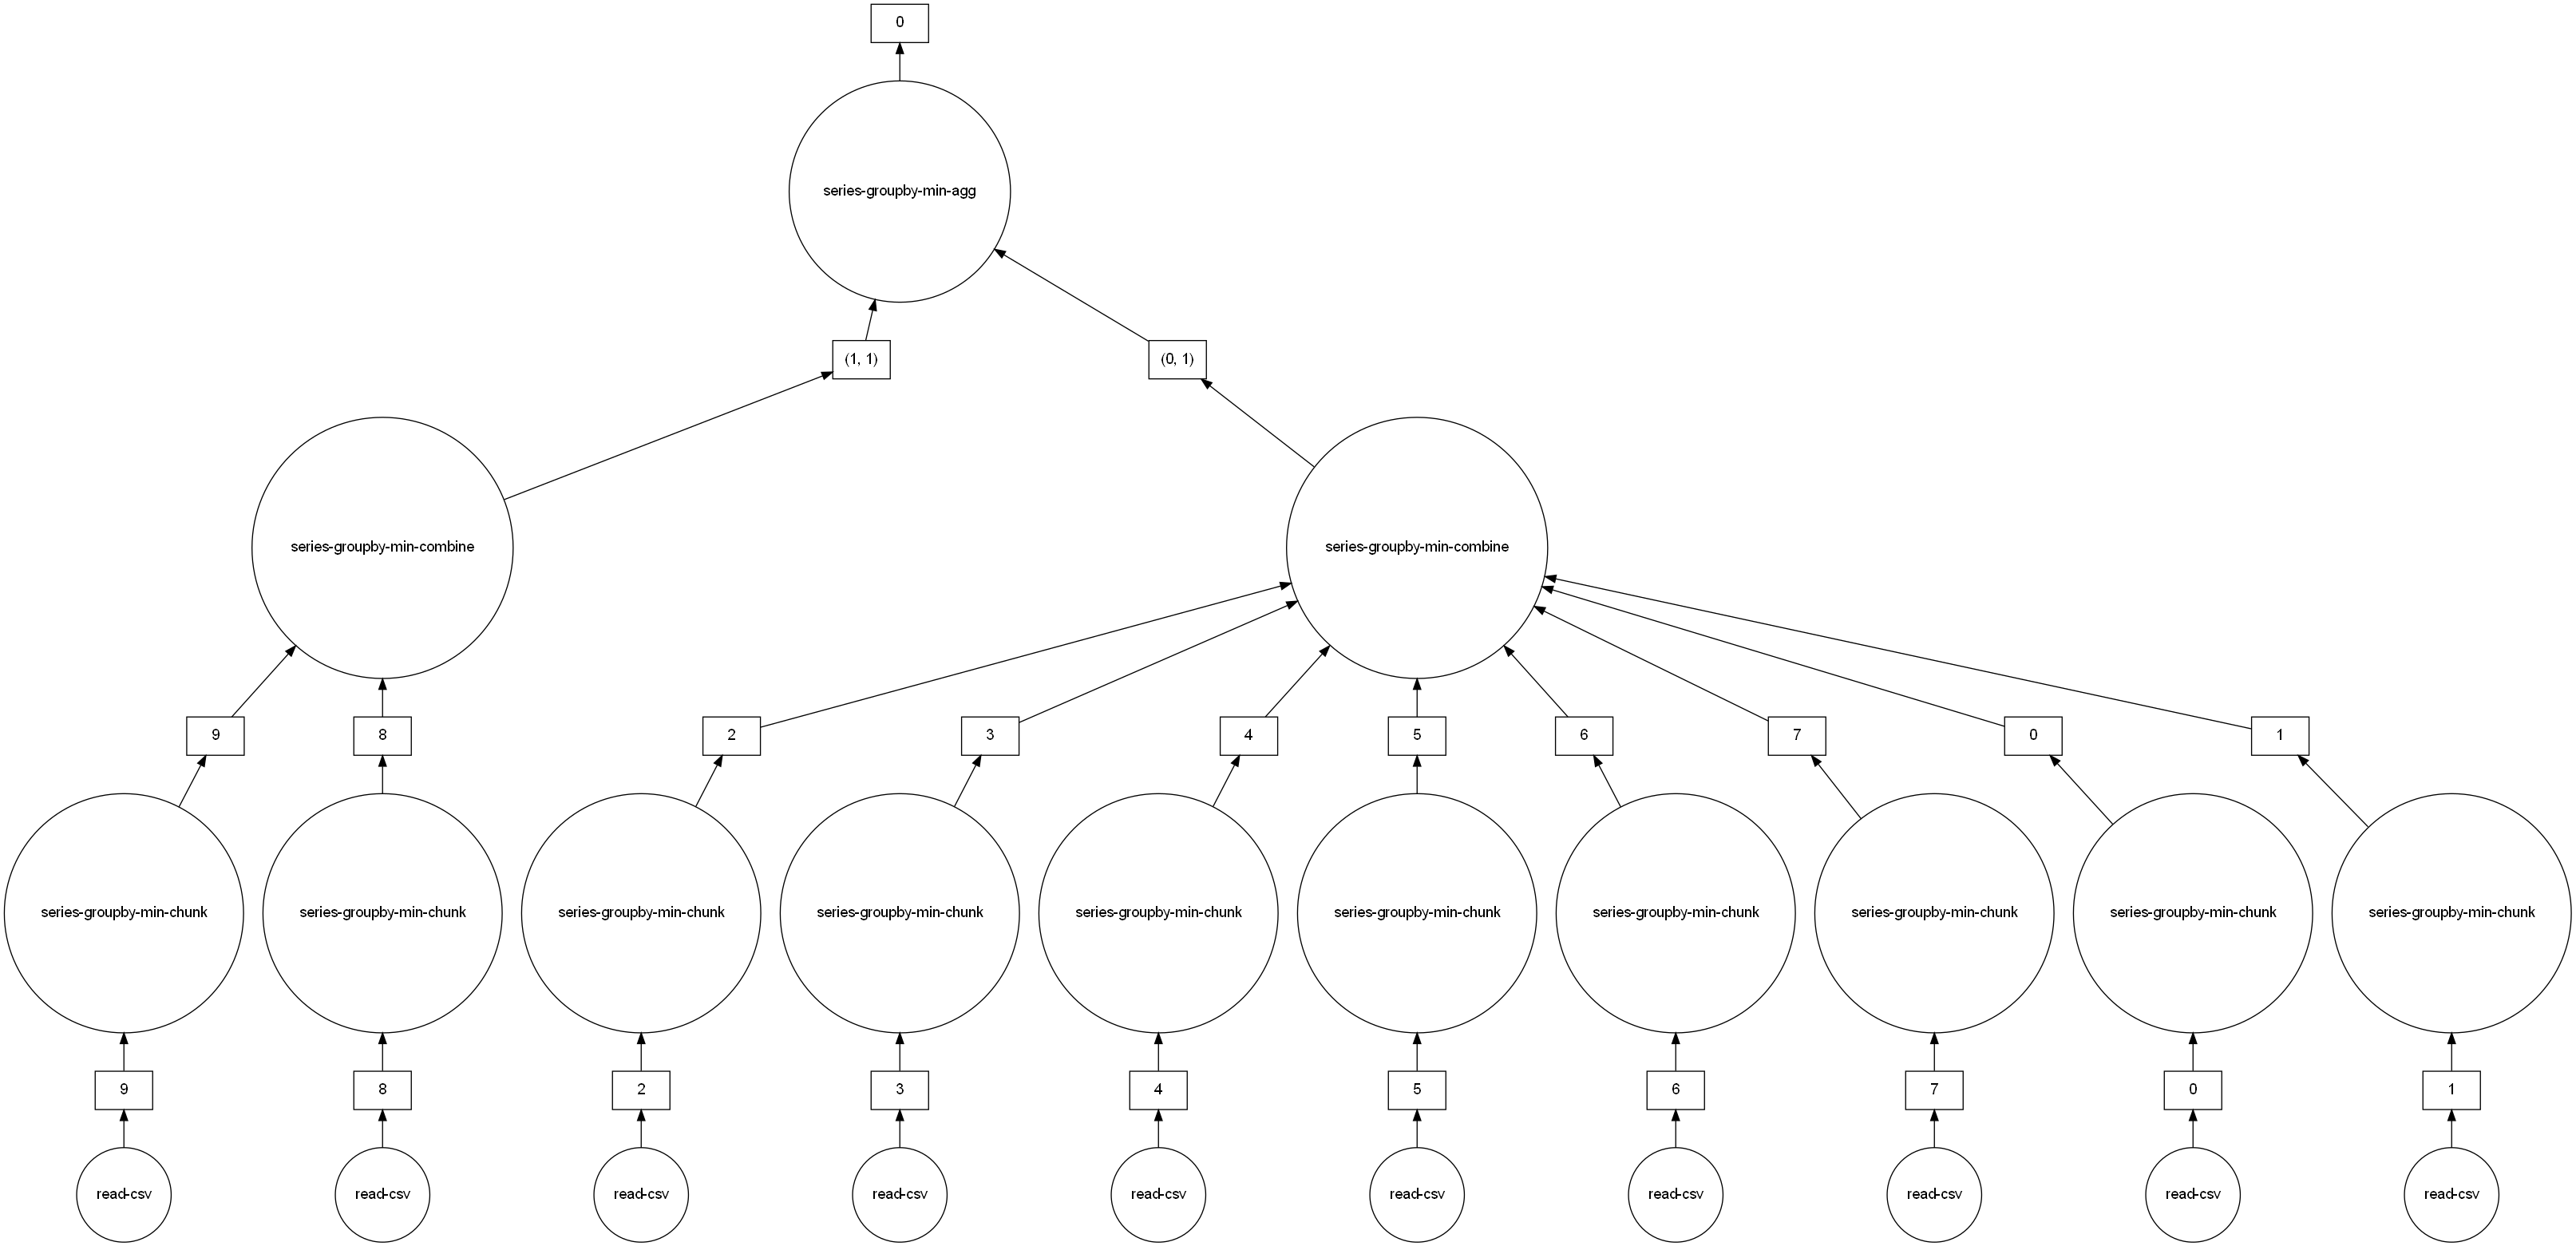

In [31]:
ddf.groupby("Dest")["ArrDelay"].min().visualize()

## Task 11. Use Distributed Task Scheduler

Once we have set up a task graph, we neeed a scheduler to execute it.\
It is recommended to use the distributed scheduler even if you will only be performing all tasks on a single machine (and using threads for parallelization).

Set up a local cluster that uses only your own computer.

In [32]:
# to call the below line of code (in the next cell), we need to first establish a distributed client (and cluster).


from dask.distributed import Client

client = Client(n_workers = 4 , threads_per_worker=2, memory_limit = '1GB', processes = True)
print(client)
client.cluster

# As soon as you create a client, Dask will automatically start using it.

<Client: 'tcp://127.0.0.1:65347' processes=4 threads=8, memory=3.73 GiB>


In [33]:
from dask.diagnostics import ProgressBar 
ProgressBar().register()

In [34]:
# run the followng command and then click on Dashboard to view the distributed scheduler at work
ddf.groupby("Dest")["ArrDelay"].min().compute()


Dest
ABE    -33.0
ALB    -26.0
ATL   -311.0
BDL    -39.0
BGR    -30.0
       ...  
AUS    -65.0
CRP    -16.0
HNL    -63.0
BHM    -30.0
TUS    -55.0
Name: ArrDelay, Length: 99, dtype: float64

## Task 12. Using a different scheduler for specifc tasks

In [35]:
x = ddf.groupby("Dest")["ArrDelay"].min()
x.compute(scheduler='threads')

[                                        ] | 0% Completed |  0.1s

C:\Users\u0625859\Anaconda3\envs\daskpy\lib\site-packages\dask\base.py:1283: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


[########################################] | 100% Completed |  2.8s


Dest
ABE    -33.0
ALB    -26.0
ATL   -311.0
BDL    -39.0
BGR    -30.0
       ...  
AUS    -65.0
CRP    -16.0
HNL    -63.0
BHM    -30.0
TUS    -55.0
Name: ArrDelay, Length: 99, dtype: float64

In [36]:
with dask.config.set(scheduler='processes'):
    print(x.compute())

[########################################] | 100% Completed |  3.9s
Dest
ABE    -33.0
ALB    -26.0
ATL   -311.0
BDL    -39.0
BGR    -30.0
       ...  
AUS    -65.0
CRP    -16.0
HNL    -63.0
BHM    -30.0
TUS    -55.0
Name: ArrDelay, Length: 99, dtype: float64


A good rule of thumb for choosing number of threads per Dask worker is to choose the square root of the number of cores per node.
- In general more threads per worker are good for a program that spends most of its time in NumPy, SciPy, Numba, etc., and fewer threads per worker are better for simpler programs that spend most of their time in the Python interpreter.



The Dask distributed scheduler provides live feedback in two forms:
- An interactive dashboard containing many plots and tables with live information
- A progress bar suitable for interactive use in consoles or notebooks
If Bokeh is installed then the dashboard will start up automatically whenever the scheduler is created. For local use this happens when you create a client with no arguments:
    
It is typically served at http://localhost:8787/status , but may be served elsewhere if this port is taken. The address of the dashboard will be displayed if you are in a Jupyter Notebook

# SECTION E. ML with DASK

## Task 1. Generate random classification data

In [37]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=4, random_state=42)


In [38]:
X[:8]

array([[ 1.52264971, -0.93455988, -0.46502165,  0.05887383],
       [ 1.04810323, -0.74680553,  0.43685274,  0.85962787],
       [ 1.02421601, -0.44941167, -1.62343415, -1.37865568],
       [-0.43466749,  0.2817535 ,  0.02329917, -0.13524348],
       [ 1.42116496, -0.73157419, -1.46292601, -1.05843534],
       [-1.50151205,  0.71480051,  1.9707597 ,  1.57830956],
       [-2.4006012 ,  1.22484935,  2.55092622,  1.87422063],
       [-3.37572558,  1.57900451,  4.63562047,  3.77013439]])

In [39]:
y[:8]

array([0, 1, 0, 1, 0, 1, 1, 1])

## Task 2. Fit a SVC classifier

In [40]:
from sklearn.svm import SVC

estimator = SVC(random_state=42)
estimator.fit(X, y)

SVC(random_state=42)

In [41]:
# we have four attributes/features, so we will get four values
estimator.support_vectors_[:5]

array([[ 0.50024005, -0.30339627, -0.17937237, -0.00943967],
       [-0.95210041,  0.5179601 ,  0.77643959,  0.48873204],
       [ 0.84900722, -0.45158997, -0.76758357, -0.51720528],
       [-1.04563826,  0.58850073,  0.70899058,  0.38121538],
       [ 1.32873515, -0.8217086 , -0.36069336,  0.10018613]])

In [42]:
estimator.score(X, y)

0.9367

## Task 3. Hyper-parameter tuning

In [43]:
estimator = SVC(C=0.00001, shrinking=False, random_state=42)
estimator.fit(X, y)
estimator.support_vectors_[:5]

array([[ 1.52264971, -0.93455988, -0.46502165,  0.05887383],
       [ 1.02421601, -0.44941167, -1.62343415, -1.37865568],
       [ 1.42116496, -0.73157419, -1.46292601, -1.05843534],
       [ 1.32275448, -0.7178123 , -1.09180165, -0.69316426],
       [-1.35718018,  0.85088312,  0.28370498, -0.19399672]])

In [44]:
estimator.score(X, y)

0.8887

## Task 4. Applying GridsearchCV on a single core

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
estimator = SVC(gamma='auto', probability=True,  random_state=42 )

param_grid = {
    'C': [0.001, 10.0],
    'kernel': ['rbf', 'poly', 'linear'],
}

In [47]:
grid_search = GridSearchCV(estimator, 
                           param_grid, 
                           verbose=2, 
                           cv=2)

In [48]:
%time   grid_search.fit(X, y)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] END ................................C=0.001, kernel=rbf; total time=   6.3s
[CV] END ................................C=0.001, kernel=rbf; total time=   5.7s
[CV] END ...............................C=0.001, kernel=poly; total time=   2.1s
[CV] END ...............................C=0.001, kernel=poly; total time=   2.0s
[CV] END .............................C=0.001, kernel=linear; total time=   1.3s
[CV] END .............................C=0.001, kernel=linear; total time=   1.3s
[CV] END .................................C=10.0, kernel=rbf; total time=   0.9s
[CV] END .................................C=10.0, kernel=rbf; total time=   0.9s
[CV] END ................................C=10.0, kernel=poly; total time=   2.9s
[CV] END ................................C=10.0, kernel=poly; total time=   2.8s
[CV] END ..............................C=10.0, kernel=linear; total time=   2.4s
[CV] END ..............................C=10.0, ke

GridSearchCV(cv=2,
             estimator=SVC(gamma='auto', probability=True, random_state=42),
             param_grid={'C': [0.001, 10.0],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=2)

In [49]:
grid_search.best_params_, grid_search.best_score_

({'C': 10.0, 'kernel': 'rbf'}, 0.9387000000000001)

## Task 5. Applying GridSearchCV on multi-cores (native Scikit parallelism)

In [50]:
# first  let us check the number of CPU cores available on our machine

import os
  
n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

Number of CPUs in the system: 20


In [51]:
grid_search_MC = GridSearchCV(estimator, 
                              param_grid, 
                              verbose=2, 
                              cv=2, 
                              n_jobs=-1)

In [52]:
%time  grid_search_MC.fit(X, y)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
Wall time: 19.3 s


GridSearchCV(cv=2,
             estimator=SVC(gamma='auto', probability=True, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 10.0],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=2)

In [53]:
grid_search_MC.best_params_, grid_search_MC.best_score_

({'C': 10.0, 'kernel': 'rbf'}, 0.9387000000000001)

## Task 6. Parallelism with Dask

We have a local cluster called client running in this notebook already - we will use that for parallelism.

In [54]:
import joblib

In [55]:
param_grid = {
    'C': [0.001, 0.1, 1.0, 2.5, 5., 10.0, 100., 500., 1000.],
    # Uncomment below two lines to perform larger Grid searches on a cluster
    #'kernel': ['rbf', 'poly', 'linear'],
    #'shrinking': [True, False],
}

In [56]:
grid_search_Dist = GridSearchCV(estimator, 
                                param_grid, 
                                verbose=2, 
                                cv=2, 
                                n_jobs=-1)

In [57]:
%%time

with joblib.parallel_backend("dask"):
    grid_search_Dist.fit(X, y)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
Wall time: 28.3 s


In [58]:
pd.DataFrame(grid_search_Dist.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,9.870254,0.700430,2.356912,0.367291,0.001,{'C': 0.001},0.8938,0.8916,0.8927,0.0011,9
1,2.343052,0.030012,0.932883,0.099679,0.1,{'C': 0.1},0.9338,0.9296,0.9317,0.0021,8
2,1.953525,0.022087,0.635823,0.081279,1.0,{'C': 1.0},0.9378,0.9346,0.9362,0.0016,7
3,2.042307,0.039618,0.589942,0.049826,2.5,{'C': 2.5},0.9396,0.9360,0.9378,0.0018,6
4,2.074069,0.187682,0.638106,0.081030,5.0,{'C': 5.0},0.9406,0.9360,0.9383,0.0023,5


In [59]:
grid_search_Dist.best_params_, grid_search_Dist.best_score_

({'C': 500.0}, 0.9393)

In [60]:
# let us obtain predicted values
y_pred = grid_search_Dist.predict(X)

In [61]:
# use an alternate performance measure. 
# sklearn.metrics.classification_report provides a sumamry of several measures

from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      5000
           1       0.92      0.96      0.94      5000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



## Task 7. Close the Client

In [62]:
client.shutdown()

2023-02-16 14:24:30,991 - distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client


# THE END